### Dataset information:
This dataset is from a 2014 survey that measures attitudes towards mental health and frequency of mental health disorders in the workplace.

#### Content:
This dataset contains the following data:

Timestamp, Age, Gender, Country

state: If you live in the United States, which state or territory do you live in?

self_employed: Are you self-employed?

family_history: Do you have a family history of mental illness?

treatment: Have you sought treatment for a mental health condition?

work_interfere: If you have a mental health condition, do you feel that it interferes with your work?

no_employees: How many employees does your company or organization have?

remote_work: Do you work remotely (outside of an office) at least 50% of the time?

tech_company: Is your employer primarily a tech company/organization?

benefits: Does your employer provide mental health benefits?

care_options: Do you know the options for mental health care your employer provides?

wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?

seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?

anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?

leave: How easy is it for you to take medical leave for a mental health condition?

mental_health_consequence: Do you think that discussing a mental health issue with your employer would have negative consequences?

phys_health_consequence: Do you think that discussing a physical health issue with your employer would have negative consequences?

coworkers: Would you be willing to discuss a mental health issue with your coworkers?

supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?

mental_health_interview: Would you bring up a mental health issue with a potential employer in an interview?

phys_health_interview: Would you bring up a physical health issue with a potential employer in an interview?

mental_vs_physical: Do you feel that your employer takes mental health as seriously as physical health?

obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

comments: Any additional notes or comments

### Dataset analysis:
1. By using the 'treatment' and 'work_interfere' columns, find the surveyed who are mentally ill.
- Clean 'Age' columns, parametrize the 'Gender' column.
- Explore dataset for possible insights.

### Hypothesis to be checked:
- Does family history of mental illness means higher chance of mental illness?
- Are people working in tech companies more prone to mental illness?
- Does gender correlate with mental illness?
- Does Age correlate with Mental Illness?
- Is company size correlated with mental illness?
- How is mental illness health care and benefits approach?
- Work Culture on mental illness.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# ! pip3 install wordcloud
from wordcloud import WordCloud

In [8]:
ds = pd.read_csv('survey.csv')
ds.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [10]:
# Basic Dataset Info:
print(ds.dtypes)

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object


In [11]:
[print(c, ds[c].unique()) for c in ds.columns]

Timestamp ['2014-08-27 11:29:31' '2014-08-27 11:29:37' '2014-08-27 11:29:44' ...
 '2015-11-07 12:36:58' '2015-11-30 21:25:06' '2016-02-01 23:04:31']
Age [         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]
Gender ['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Fem

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

### CLEANING DATASET:

In [12]:
# Substituting non-sense ages by NaN, range accepted 16-75 (working age)
# removing symbols (-) (considered misspelling)

age = ds['Age'].apply(lambda x: str(x).replace('-', '') if 16<int(x)<99 else 'NaN')
sorted(age.unique())

['18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '60',
 '61',
 '62',
 '65',
 '72',
 'NaN']

In [16]:
# Funnel the genders to 3 (male, female, other):(M, F, O)
# Considered words close to male and female as male and female (fixing possible misspellings)

gender = ds.Gender.str.upper()
gender = gender.apply(lambda x: x.replace('(CIS)', '').replace('CIS', ''))

# all words that started with MA refered to male, and FE to female, so:
def gender_par(i):
    return 'M' if (i == 'M' or i.startswith('MA')) else 'F' if (i == 'F' or
    i.startswith('FE') or i.startswith('WO') or 'FEMALE' in i) else i 

gender = gender.apply(gender_par)

gender = gender.apply(lambda x: ' '.join(x).strip())
gender = gender.apply(lambda x: x if x == 'M' or x == 'F' else 'O')

gender.unique()

0       F
1       M
2       M
3       M
4       M
       ..
1254    M
1255    M
1256    M
1257    F
1258    M
Name: Gender, Length: 1259, dtype: object

### MANIPULATING DATASET

##### Filtering the mentally ill:
- To find the mental ill, filtered by who seeks treatment or answered NaN in work_interfere.

##### Assumptions:
1. People that chose 'Yes' for 'treatment' are mental ill;
2. Since the question is: "If you have mental illness...", we can assume people who answered 'work_interfere' differently then 'NaN' are mental ill.

Not considering possible missinterpretations by the person on the 'work_interfere' question, so, included 'Never' as people who are mental ill, but the illness never interfered in work

In [17]:
ills = ds[(ds['treatment'] == 'Yes') | (ds['work_interfere'].notnull())] 
not_ills = ds[(ds['treatment'] == 'No') & (ds['work_interfere'].isnull())]
average_ills = len(ills)/len(ds)
len(ills)

999

### EXPLORING DATASET AND VISUALIZING DATA

#### 1. Does family history of mental illness means higher chance of mental illness?

The average of ill people that knows about mental illness history in the family is 0.45. 
The average of non ill people that knows about mental illness history in the family is 0.16.


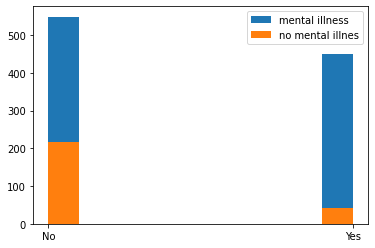

In [18]:
plt.hist(ills['family_history'], label='mental illness')
plt.hist(not_ills['family_history'], label='no mental illnes')
plt.legend()

# Some math for conclusions:

average_family_ills = round(len(ills[ills['family_history'] == 'Yes']) / len(ills),2)
average_family_notills = round(len(not_ills[not_ills['family_history'] == 'Yes']) / len(not_ills),2)

print('The average of ill people that knows about mental illness history in the family is {}. \n\
The average of non ill people that knows about mental illness history in the family is {}.'
.format(average_family_ills, average_family_notills))

#### Insights:
- Mental illness affects ~80% of the surveyed population.
- People that are mentally ill have 45% chance of knowing about mental illness in family history.
- People who are not mentally ill have 16% chance of knowing about mental illness in family history.



#### Conclusions:
- There is a correlation between mental illness and family history, since people with mental
illness have 3x higher chances of having a family history than with people who don't have mental
illness;
- We cannot fully infer causality because:
    * mentally ill people might be more concerned about mental illness family history,
    therefore, learn that information,specially because they're often inquired by doctors
    about it.
    * people without mental illness might be less concerned about mental illness in the
    family history, therefore, might not know about it.

##### 2. Are people working in tech companies more prone to mental illness?

The average of ill people that work in tech companies is 0.82. 
The average of not ill people that work in tech companies is 0.82.


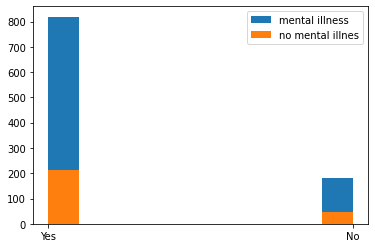

In [19]:
## disconsidering people who did not know if they worked in tech companies

plt.hist(ills['tech_company'], label='mental illness')
plt.hist(not_ills['tech_company'], label='no mental illnes')
plt.legend()

average_ill_tech = round(len(ills[ills['tech_company'] == 'Yes'])/len(ills),2)
average_notill_tech = round(len(not_ills[not_ills['tech_company'] == 'Yes'])/len(not_ills),2)

print('The average of ill people that work in tech companies is {}. \n\
The average of not ill people that work in tech companies is {}.'
.format(average_ill_tech, average_notill_tech))

#### Insights:
- The average of ill people that work in tech companies is 82%. 
- The average of not ill people that work in tech companies is also 82%.


#### Conclusions:
- There is no correlation between mental illness and working in tech companies, since about the
same amount of people with and without mental illness work in tech companies.


#### 3. Does gender correlate with mental illness?

The average of female with mental illness is 0.86. 
The average of male with mental illness is 0.77. 
The average of other genders with mental illness is 0.95.


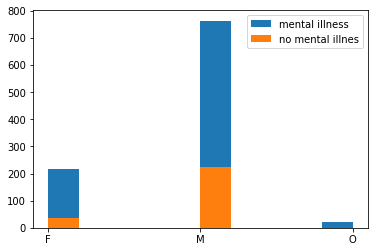

In [20]:
# avoiding 'A value is trying to be set on a copy of a slice from a DataFrame' issue
ills = ills.copy()
not_ills = not_ills.copy()

# replacing gender column with simplified gender column (M/F/O)
ds['Gender'] = gender
ills['Gender'] = gender
not_ills['Gender'] = gender

plt.hist(ills['Gender'], label='mental illness')
plt.hist(not_ills['Gender'], label='no mental illnes')
plt.legend()

average_ill_F = round(len(ills[ills['Gender'] == 'F'])/len(ills),2)
average_F = round(len(ds[ds['Gender'] == 'F'])/len(ds),2)

average_ill_M = round(len(ills[ills['Gender'] == 'M'])/len(ills),2)
average_M = round(len(ds[ds['Gender'] == 'M'])/len(ds),2)

average_ill_O = round(len(ills[ills['Gender'] == 'O'])/len(ills),2)
average_O = round(len(ds[ds['Gender'] == 'O'])/len(ds),2)

# correlating:
## first adding column 'Yes' for ill 'No' for not ill
ds['work_interfere'] = ds['work_interfere'].fillna('NaN')
ds['Ill'] = ds.apply(lambda x: 'Yes' if (x['treatment'] == 'Yes') or (
    x['work_interfere'] != 'NaN') else 'No', axis=1)
#ds['Gender'] = ds['Gender'].replace('M', 0).replace('F', 1).replace('O', 2)

#grouping and counting:
gender_all = ds.groupby(by='Gender').count()['Timestamp']
gender_ill = ills.groupby(by='Gender').count()['Timestamp']

avg_f = round(gender_ill['F']/gender_all['F'],2)
avg_m = round(gender_ill['M']/gender_all['M'],2)
avg_o = round(gender_ill['O']/gender_all['O'],2)

print('The average of female with mental illness is {}. \n\
The average of male with mental illness is {}. \n\
The average of other genders with mental illness is {}.'
.format(avg_f, avg_m, avg_o))

#### Insights:
- The average of female with mental illness is 86%. 
- The average of male with mental illness is 77%. 
- The average of other genders with mental illness is 95%.


#### Conclusions:
- There is no reasonable correlation between mental illness and gender, since the average difference
between genders aren't significant enough and the amount of data on people who identify themselves differently than male and female is also too small.

#### 4. Does Age correlate with Mental Illness?

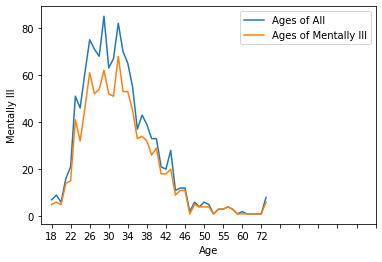

In [21]:
ds['Age'] = age
ills['Age'] = ds[(ds['treatment'] == 'Yes') | (ds['work_interfere'].notnull())]['Age']
ds_age = ds.sort_values(by='Age').groupby(by='Age').count()['Timestamp']
ills_age = ills.sort_values(by='Age').groupby(by='Age').count()['Timestamp']

plt.plot(ds_age, label='Ages of All')
plt.plot(ills_age, label='Ages of Mentally Ill')
plt.xticks(np.arange(0,72, step=4))

plt.xlabel('Age')
plt.ylabel('Mentally Ill')

plt.legend()
plt.show()

#### Insights:
- Mental illness is more constant on people with ages under 23 and over 40.
- There are apparently some ages between 23-40 where mental illness is also more common. 

#### Conclusions:
- There might be a correlation between mental illness and age, being necessary a larger dataset to
be more accurate on the assumption, also, it would be interesting to set a research on what mental
illness are beeing considered on the survey.

#### 5. Is company size correlated with mental illness?

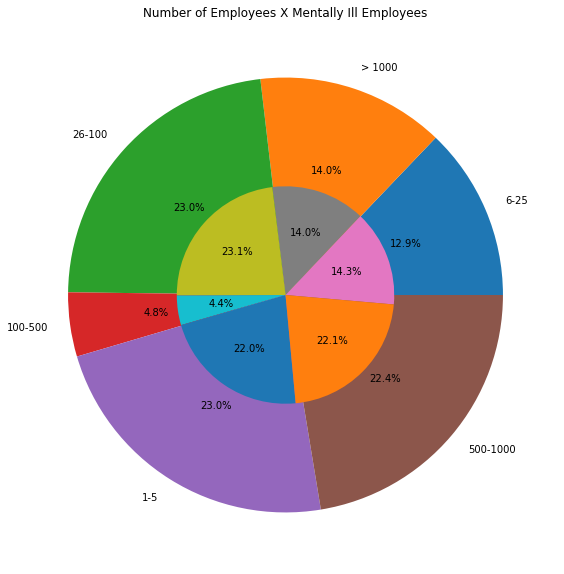

In [22]:
#plotting pie charts

labels = ['6-25', '> 1000', '26-100', '100-500', '1-5', '500-1000',]

fig, ax =  plt.subplots(figsize=(20, 10))

ax.pie(ds.groupby(by='no_employees').count()['Timestamp'], radius=1, labels=labels, autopct='%1.1f%%')

ax.pie(ills.groupby(by='no_employees').count()['Timestamp'], radius=0.5, \
       autopct='%1.1f%%', startangle=-5)

ax.set(aspect="equal", title='Number of Employees X Mentally Ill Employees')
plt.show()

#### Insights:
- The companies with higher average off people with mental illness are the ones who have 26-100 employees (14.3%/12.9%).
- The companies with lower average off people with mental illness are the ones who have 100-500
employes (4.4%/4.8%).


#### Conclusions:
- There is no reasonable correlation between mental illness and company size,
since there is no big difference between the percentage of people surveyed in each group of company
size, and the percentage of people mentally ill in each group of company size.
- Also, it is important to notice that maybe some people surveyed worked in the same company,
specially probable for bigger companies, which would affect the outcome of the study.

#### 6. How is mental illness health care and benefits approach?

##### 6.1 Benefits

0.3

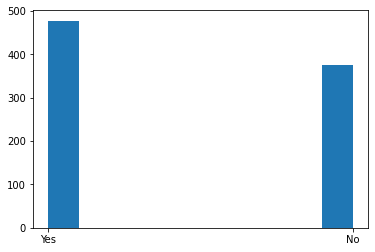

In [23]:
benefits = ds[ds['benefits'] != "Don't know"]['benefits']
plt.hist(benefits)
round(len(ds[ds['benefits'] == 'No'])/len(ds), 2)

#### 6.2. Care options

* Disclaimer: Despite the question itself being a little missleading (Do you know the options for mental health care your employer provides?), we can assume that Yes = have options, No = don't have options, Not sure = don't know if have options.

0.4

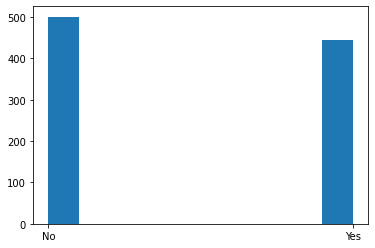

In [24]:
# To analyse our data, we will only rely on the 'Yes' and 'No':
care = ds[ds['care_options'] != 'Not sure']['care_options']
plt.hist(care)
round(len(ds[ds['care_options'] == 'No'])/len(ds), 2)


#### 6.3 Since some companies might have care options but not benefits, we better cross-fact the info:

In [25]:
care_ben = ds[(ds['benefits'] == 'Yes') | (ds['care_options'] == 'Yes')][['benefits', 'care_options']]
round(len(care_ben)/len(ds),2)
# So, we can assume that at least 50% of the companies offer mental health care or benefits.

0.5

##### 6.3.3
For further analysis we can use the 'Don't knows' and 'Not sures' answer from above to analyse if they are coming from people who have mental illnes or from the ones who don't.
We can relate those answers with probable fear of asking the company if they offer the benefits/care, and also to lack of information provided by the company.

In [26]:
print(round(len(ills[(ills['benefits'] == "Don't know") | (ills['benefits'] == "Not sure")])\
            /len(ills), 2))

# Comparison with people who don't have mental illness:
print(round(len(not_ills[(not_ills['benefits'] == "Don't know") | \
                         (not_ills['benefits'] == "Not sure")])/len(not_ills), 2))


0.3
0.43


### Insights:
- Here we notice a lot of 'don't know', and a close enough ammount of 'yes' and 'no', making it hard to take any conclusions on this matter.
- Also, it's important to note that in many countries mental health is included in health benefits in general.
- What we can assume is that at least 30% of the companies don't have benefits for people with mental illness.
- At least 40% of the people surveyed don't have care options for mentally ill in their companies.
- We can infer that 30% of mentally ill people are not informed about health care / benefits in their company.
- People without mental illness are more prone to not knowing about the topics (43%).

### 7. Work Culture on mental illness.

Since mental health care and benefits have finacial consequences to the company, they were treated in the topic below, appart from the company culture. Here we will analyse the social and human conditions on the topic. Also, we are not considering uncertain answers ('don't knows', 'not sures').

To analyse the work culture in companies on mental illness we can analyse the columns:
- wellness_program, seek_help, anonymity, leave, mental_health_consequence, obs_consequence.

For further analysis we can compare the mental_health_consequence with phys_health_consequence.

First, we will check the percentage of the companies with best practices:

In [27]:
best = ds[(ds['wellness_program'] == 'Yes') & (ds['seek_help'] == 'Yes') & (ds['anonymity'] == 'Yes')\
& ((ds['leave'] == 'Very easy') | (ds['leave'] == 'Somewhat easy')) &    \
(ds['mental_health_consequence'] == 'No') & (ds['obs_consequence'] == 'No')].copy()

round(len(best)/len(ds),2)
best

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,Ill
61,2014-08-27 11:49:51,26,F,Poland,NaN,No,No,Yes,Sometimes,26-100,...,No,No,Yes,Yes,Maybe,Yes,Yes,No,NaN,Yes
90,2014-08-27 12:12:47,31,M,United States,NY,No,No,No,Never,500-1000,...,No,No,Some of them,Yes,No,No,Yes,No,NaN,Yes
103,2014-08-27 12:20:10,33,M,United States,WI,No,Yes,Yes,Sometimes,26-100,...,No,No,Some of them,Yes,Maybe,Maybe,Yes,No,NaN,Yes
111,2014-08-27 12:31:02,28,M,United States,CA,No,No,Yes,Sometimes,26-100,...,No,No,Some of them,Some of them,No,Maybe,Yes,No,NaN,Yes
210,2014-08-27 13:06:00,40,F,United States,DC,No,No,No,NaN,26-100,...,No,No,Some of them,Yes,No,No,Yes,No,NaN,No
238,2014-08-27 13:29:57,37,F,United States,NC,No,Yes,Yes,Sometimes,More than 1000,...,No,No,Some of them,Some of them,No,Maybe,Yes,No,NaN,Yes
242,2014-08-27 13:32:48,33,M,United States,CA,No,Yes,Yes,Sometimes,26-100,...,No,No,Some of them,Yes,No,No,Don't know,No,NaN,Yes
272,2014-08-27 13:56:35,30,M,United States,NJ,No,No,No,NaN,More than 1000,...,No,No,Some of them,Yes,No,No,Yes,No,NaN,No
317,2014-08-27 14:27:28,25,M,United States,UT,No,No,No,Never,More than 1000,...,No,No,Some of them,Yes,Maybe,Maybe,Yes,No,NaN,Yes
330,2014-08-27 14:32:46,24,M,United States,WA,No,No,No,NaN,26-100,...,No,No,Some of them,Some of them,No,Maybe,Yes,No,NaN,No


#### 7.1. Finding relations within the companies adopting best practices and countries

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

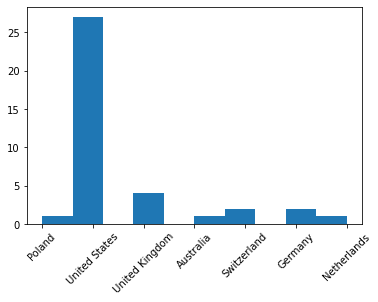

In [28]:
# We can check if the country of the company influence on it adopting best practices
# towards mental illness

best_country = best.groupby('Country').count()
plt.hist(best['Country'])
plt.xticks(rotation=45)

# USA is the country with most people surveyed working on best practice companies,
# so, we must check the percentage of people from US taking the survey with
# the other countries

<ipython-input-29-03a7636517ee>:16: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(for_pie['percent'], explode=explode, labels=labels, autopct='%1.1f%%', \


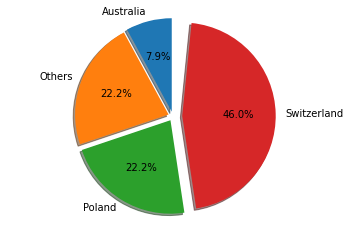

38

In [29]:
# 7.1.1. Comparing USA surveyed
countries = ds.groupby('Country').count()
countries = countries.loc[best_country.index.values.tolist(), ['Timestamp']]
countries['best'] = best_country['Timestamp']
# Considering the amount of people surveyed in each country as counter weights:
countries['percent'] = round(best_country['Timestamp']/countries['Timestamp'],2)
# getting the full percentage, normalizing the 'percent' column
countries['percent'] = countries['percent'].apply(lambda x : x/0.63)
# Taking top three countries, to make pie chart cleaner:
countries.reset_index(inplace=True)
countries['top'] = countries.apply(lambda x: 'Others' if x['percent'] < 0.07 else x['Country'],axis=1)
for_pie = countries.groupby('top').agg({'percent':np.sum})
#plotting
explode = (0.05, 0.05, 0.05, 0.1)
labels = for_pie.index.values.tolist()
plt.pie(for_pie['percent'], explode=explode, labels=labels, autopct='%1.1f%%', \
        shadow=True, startangle=90)
plt.axis('equal')
plt.show()
len(best)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

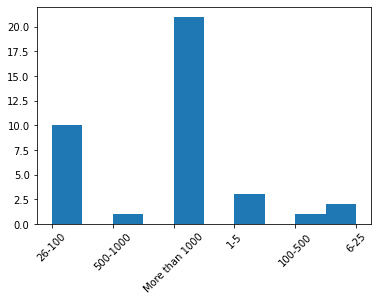

In [30]:
# 7.2. Finding relations within the companies adopting best practices and countries
# We can check if the size of the company influence on it adopting best practices
# towards mental illness
best_sizes = best.groupby('no_employees').count()
plt.hist(best['no_employees'])
plt.xticks(rotation=45)

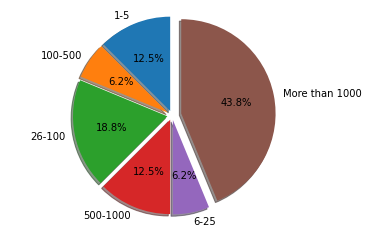

In [31]:
# 7.1.2. Comparing surveyed in each country
sizes = ds.groupby('no_employees').count()
sizes = sizes.loc[best_sizes.index.values.tolist(), ['Timestamp']]
sizes['best'] = best_sizes['Timestamp']
# Considering the amount of people surveyed in each country as counter weights:
sizes['percent'] = round(best_sizes['Timestamp']/sizes['Timestamp'],2)
# getting the full percentage, normalizing the 'percent' column to fit the pie chart
sizes['percent'] = sizes['percent'].apply(lambda x : x/0.16)

#plotting
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.1)
labels = sizes.index.values.tolist()
plt.pie(sizes['percent'], explode=explode, labels=labels, autopct='%1.1f%%', \
        shadow=True, startangle=90)
plt.axis('equal')
plt.show()

#### 7.2. Employee with mental illness behavior according to best practice companies

Another interesting analysis we can make if the behavior of the mentally ill employee in best practices companies, comparing to the ones in other companies, if they feel more willing to talk about their situation in best practices companies.
To do that we can gather information from columns 'supervisor' and 'coworkers' to compare.

In [32]:
# Taking out the best practice companies from the full dataframe:
indexes = [i for i in ds.index.values.tolist() if i not in best.index.values.tolist()]
nds = ds.reset_index()
nds = nds[nds['index'].isin(indexes)]

av_nds = len(nds[((nds['supervisor'] == 'Yes') | (nds['supervisor'] == 'Some of them')) & \
    ((nds['coworkers'] == 'Yes') | (nds['coworkers'] == 'Some of them'))])/len(nds)
av_best = len(best[((best['supervisor'] == 'Yes') | (best['supervisor'] == 'Some of them')) & \
    ((best['coworkers'] == 'Yes') | (best['coworkers'] == 'Some of them'))])/len(best)
print(round(av_nds,2), round(av_best,2))


0.63 0.89


### Insights:
- Only 3% of people work in companies that adopt the best practices towards mental illness.
- The country with best practice is Switzerlnd, with almost 30% from total data and 43.8% considering only the countries that appeared in best practices, of course the data amount is too small for definite conclusions.
- The company size with best practice is big companies, with more than 1000 employee.
    * We might want to be careful with such conclusion, considering that the more employees a company have, higher the chance of people who took the survey work in the same comapny, affecting the results.
- Employers feel more free to talk about mental inllness in companies with most accepting culture towards it, 89% of employees in the best practice companies feel better to talk about their condition to their supervisors and coworkers, against 63% of employers from the other companies.

### 8. Comments WordCloud

To quickly check the words most used in the Comments section, we can build a wordcloud, and maybe get an ideia of what they are about.

In [33]:
stopwords =  ['a', 'as', 'about', 'after', 'all', 'also', 'always', 'am', 'an', 'and', 'any', 'are', 'at', 'be', 'been', 'being', 'but', 'by', 'came', 'can', 'cant', 'come', 'could', 'did', "didn't", 'do', 'does', "doesn't",'doing', "don't", 'else', 'for', 'from', 'get', 'give', 'goes', 'going', 'had', 'happen', 'has', 'have', 'having', 'how', 'i', 'if', 'ill', "i'll", "i'm",'in', 'into', 'is', "isn't", 'it', 'its', "it's", "I've", 'just', 'keep', 'let', 'like', 'made', 'make', 'many', 'may', 'me', "mean", "more", "mean", "more", "most", "much", "no", "not", "now", 'on', "of", "only", "or", "our", "really", "say", "see", "some", "something", "most", "much", "no", "not", "now", "of", "only", "or", "our", "really", "say", "see", "some", "something", "take", "tell", "than", "that", "the", "their", "them", "then", "they", "thing", "this", "to", "try", "up", "us", "use", "used", "uses", "very", "want", "was", "way", "we", "what", "when", "where", "which", "who", "why", "will", "with", "without", "wont", "you", "your", "you're"]

comments = ' '.join(ds[ds['comments'].notnull()]['comments'].tolist()).split()
#.apply(lambda x: x['comments'].split())

for s in stopwords:
    for w in comments:
        if w.lower() == s or len(w) < 3: 
            comments.remove(w)

bag_of_words = {k:comments.count(k) for k in set(comments) if len(k) > 1}
bag_of_words = {k:v for k,v in bag_of_words.items() if v > 20}
df_words = pd.DataFrame(bag_of_words, index=[0]).T.rename(columns={0:'#'})
df_words.sort_values('#', ascending=False)

,#
health,105
mental,99
work,43
employer,36
would,33
issues,28
people,27
company,25
know,25
because,23


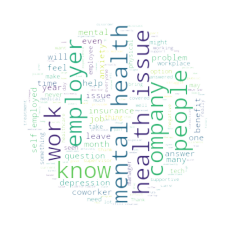

In [34]:
# wordcloud
x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)
text_comments = ' '.join(ds[ds['comments'].notnull()]['comments'])
wc_comments = WordCloud(background_color="rgba(255, 255, 255, 0)", mode="RGBA", repeat=True, mask=mask)
wc_comments.generate(text_comments)

plt.axis("off")
plt.imshow(wc_comments, interpolation="bilinear")
plt.show()

### Insights:
Some interesting words that can be useful to analyse are words such as 'depression', where we can conclude that part of the people with mental illness in the survey suffer from. 'Time' is also a word that appears a lot and maybe it would be interesting to check why.